In [64]:
import numpy as np
from PIL import Image
import os
import cv2

In [105]:
im1 = Image.open("/data/unagi0/kanayama/dataset/nuclei_images/stage1_train/ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d19659189951f540f48/masks/08494db6e5b0530016ddbeef356019290c1358b10caed7c25ba2302294210e18.png")

In [106]:
im2 =  Image.open("/data/unagi0/kanayama/dataset/nuclei_images/stage1_train/ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d19659189951f540f48/masks/099877c5aee6ec1d47c97b2b4caea340d751b03dbe93cf0192a105fe394831d2.png")

In [107]:
im1 = np.asarray(im1)
im2 = np.asarray(im2)

In [127]:
im1_large = cv2.dilate(im1, np.ones((5,5),np.uint8), iterations = 10)

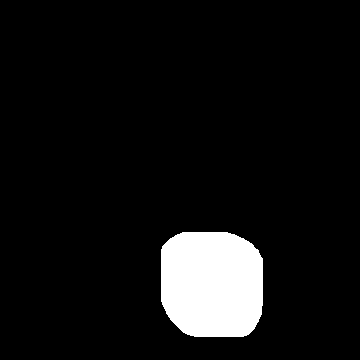

In [128]:
Image.fromarray(im1_large)

In [129]:
im1_large_bool = (im1_large == 0)
im1_bool = (im1 == 255)
im2_bool = (im2 == 255)

In [130]:
im1_large_bool

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [131]:
im3 = np.logical_and(im1_large_bool, im2_bool)

In [132]:
(im3 == im2_bool).min()

False

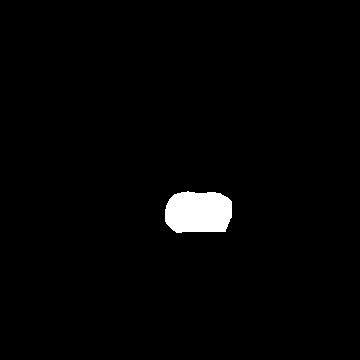

In [133]:
Image.fromarray(im3.astype(np.uint8) * 255)

In [134]:
im4 = np.logical_or(im3, im1_bool)

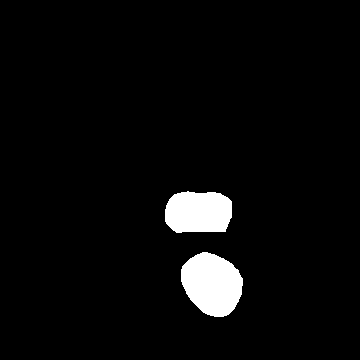

In [135]:
Image.fromarray(im4.astype(np.uint8) * 255)

In [ ]:
os.listdir('/data/unagi0/kanayama/dataset/nuclei_images/stage1_train/')

In [6]:
#imagesのpre-process
TRAIN_PATH = '/data/unagi0/kanayama/dataset/nuclei_images/stage1_train/'
DST_PATH =  '/data/unagi0/kanayama/dataset/nuclei_images/stage1_train_default/'

SIZE = (640, 640)
for dirname in os.listdir(TRAIN_PATH):
        im = Image.open(TRAIN_PATH + dirname + '/images/' + dirname + '.png')
        #im = im.resize(SIZE)
        im.save(DST_PATH + 'images/' + dirname + '.png', "png")

In [ ]:
#imagesのpre-process（白黒のみとcolorを分ける）
TRAIN_PATH = '/data/unagi0/kanayama/dataset/nuclei_images/stage1_train/'
GRAY_PATH =  '/data/unagi0/kanayama/dataset/nuclei_images/stage1_train_default_gray/'
COLOR_PATH =  '/data/unagi0/kanayama/dataset/nuclei_images/stage1_train_default_color/'
THRESH = 10

SIZE = (640, 640)
for dirname in os.listdir(TRAIN_PATH):
        im = Image.open(TRAIN_PATH + dirname + '/images/' + dirname + '.png')
        #im = im.resize(SIZE)
        im_array = np.asarray(im)
        if (im_array[:, :, 1] - im_array[:, :, 2]).sum() ** 2 <  THRESH:
            im.save(GRAY_PATH + 'images/' + dirname + '.png', "png")
        else:
            im.save(COLOR_PATH + 'images/' + dirname + '.png', "png")

In [5]:
#maskのpre-process
TRAIN_PATH = '/data/unagi0/kanayama/dataset/nuclei_images/stage1_train/'
DST_PATH =  '/data/unagi0/kanayama/dataset/nuclei_images/stage1_train_default/'

#SIZE = (640, 640)
for dirname in os.listdir(TRAIN_PATH):
        # 空の行列を作るために、最初の1個だけ見ておく
        filename_one = os.listdir(TRAIN_PATH + dirname + '/masks/')[0]
        im = Image.open(TRAIN_PATH + dirname + '/masks/' + filename_one)
        size = im.size
        tmp = np.full((size[1], size[0]), False, dtype=bool)
        
        for filename in os.listdir(TRAIN_PATH + dirname + '/masks/'):
            im = Image.open(TRAIN_PATH + dirname + '/masks/' + filename)
            #im = im.resize(SIZE)
            im = np.asarray(im)
            im = (im == 255)
            tmp = np.logical_or(tmp, im)
        im = tmp.astype(np.uint8) * 255
        im = Image.fromarray(im)
        im.save(DST_PATH + 'masks/' + dirname + '.png', "png")

In [ ]:
#test imagesのpre-process
TEST_PATH = '/data/unagi0/kanayama/dataset/nuclei_images/stage1_test/'
DST_PATH =  '/data/unagi0/kanayama/dataset/nuclei_images/stage1_test_preprocessed/'

SIZE = (640, 640)
for dirname in os.listdir(TEST_PATH):
        im = Image.open(TEST_PATH + dirname + '/images/' + dirname + '.png')
        im = im.resize(SIZE)
        im.save(DST_PATH + 'images/' + dirname + '.png', "png")

In [137]:
#maskのpre-process（膨張処理により、わずかに輪郭を描く）
TRAIN_PATH = '/data/unagi0/kanayama/dataset/nuclei_images/stage1_train/'
DST_PATH =  '/data/unagi0/kanayama/dataset/nuclei_images/stage1_train_default/'

for dirname in os.listdir(TRAIN_PATH):
        # 空の行列を作るために、最初の1個だけ見ておく
        filename_one = os.listdir(TRAIN_PATH + dirname + '/masks/')[0]
        im = Image.open(TRAIN_PATH + dirname + '/masks/' + filename_one)
        size = im.size
        tmp = np.full((size[1], size[0]), False, dtype=bool)
        
        for filename in os.listdir(TRAIN_PATH + dirname + '/masks/'):
            im = Image.open(TRAIN_PATH + dirname + '/masks/' + filename)
            im = np.asarray(im)
            # 微妙に膨張させる
            im_large = cv2.dilate(im, np.ones((5,5),np.uint8), iterations = 1)
            im_large_bool = (im_large == 0)
            im_bool = (im == 255)            
            tmp = np.logical_and(im_large_bool, tmp)
            tmp = np.logical_or(tmp, im_bool)

        im = tmp.astype(np.uint8) * 255
        im = Image.fromarray(im)
        im.save(DST_PATH + 'masks/' + dirname + '.png', "png")